# TA-09 – Simulasi Pertumbuhan Pengguna Internet Global
Model Logistik + Metode Euler

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from euler_model import logistic_euler
%matplotlib inline
plt.style.use('default')

In [4]:
# Load dataset dan filter Entity == 'World'
df = pd.read_csv('dataset/number-of-internet-users.csv')
df_world = df[df['Entity'] == 'World'].copy()
# Pastikan data terurut berdasarkan tahun
df_world = df_world.sort_values('Year')
df_world.head()

,Entity,Code,Year,Number of Internet users
6769,World,OWID_WRL,1990,2601283.5
6770,World,OWID_WRL,1991,4270533.5
6771,World,OWID_WRL,1992,6892746.5
6772,World,OWID_WRL,1993,10009239.0
6773,World,OWID_WRL,1994,20460824.0


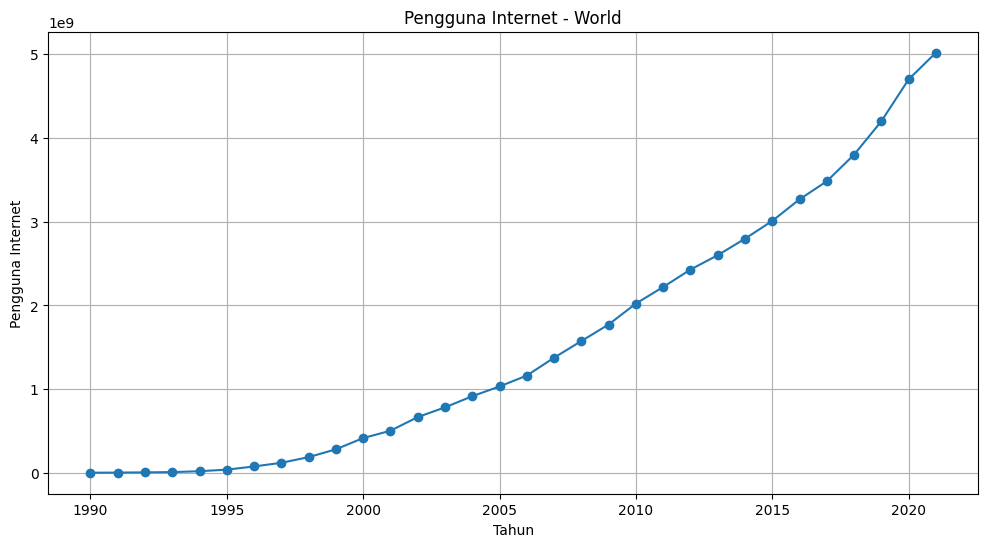

In [6]:
# Plot data asli (Year vs Internet users)
years = df_world['Year'].values
users = df_world['Number of Internet users'].values
plt.figure(figsize=(12,6))
plt.plot(years, users, marker='o', color='tab:blue')
plt.title('Pengguna Internet - World')
plt.xlabel('Tahun')
plt.ylabel('Pengguna Internet')
plt.grid(True)
plt.show()

In [7]:
# Nilai awal U0
U0 = users[0]
U0

2601283.5

In [8]:
# Estimasi awal parameter
r = 0.1
K = max(users) * 1.2  # kapasitas maksimum perkiraan
print(f'r = {r}, K = {K}')

r = 0.1, K = 6020373600.0


In [9]:
# Simulasi Euler dengan metode yang disediakan
h = 1
t_end = len(users)
t, U_sim = logistic_euler(U0, r, K, h, t_end)
# Pastikan panjang U_sim sesuai
len(t), len(U_sim)

(32, 32)

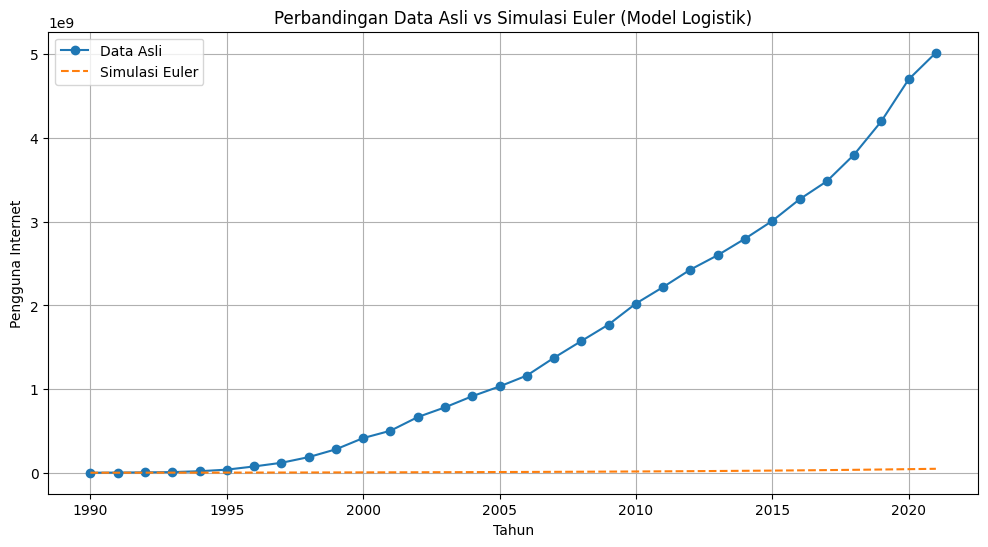

In [10]:
# Plot perbandingan data asli dan simulasi
plt.figure(figsize=(12,6))
plt.plot(years, users, label='Data Asli', marker='o', color='tab:blue')
plt.plot(years, U_sim[:len(users)], label='Simulasi Euler', linestyle='--', color='tab:orange')
plt.xlabel('Tahun')
plt.ylabel('Pengguna Internet')
plt.title('Perbandingan Data Asli vs Simulasi Euler (Model Logistik)')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# Hitung MSE
mse = np.mean((users - U_sim[:len(users)])**2)
print(f'MSE = {mse:.4f}')

MSE = 4691043307435393024.0000


## Kesimpulan:
Model logistik yang disimulasikan dengan metode Euler memberikan kurva pertumbuhan yang dapat dibandingkan dengan data aktual pengguna internet global.
Nilai error (MSE) menunjukkan sejauh mana model cocok terhadap data nyata; untuk hasil ini MSE ditampilkan pada cell sebelumnya.
Untuk meningkatkan kecocokan, parameter `r` (laju pertumbuhan) dan `K` (kapasitas maksimum) dapat di-tuning menggunakan metode optimisasi atau pencarian grid.
Perlu dicatat bahwa model logistik sederhana mungkin tidak menangkap semua dinamika nyata (mis. percepatan teknologi, kebijakan), sehingga model yang lebih kompleks atau fitting parameter berbasis data akan membantu meningkatkan akurasi.